In [1]:
# set the working directory to be the root of the package
# so that the imports work below
import sys
sys.path.append("..")

In [2]:
import random
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from xgboost import plot_tree, plot_importance
import models.xgb as xgb
import models.data_util

In [3]:
data_file = "../data/clean.pkl"  # set this accordingly
model_file = "../data/xgb_model.bin"
predictor_names = list(pd.read_pickle(data_file).drop('isfailed', axis=1).columns)

In [4]:
# Use helper function to convert everything to numpy etc:
x, y_true = models.data_util.load_raw_data(data_file)

In [5]:
# load model
model = xgb.from_file(model_file)

In [6]:
# predict probabilities of positive class:
y_pred = model.predict_proba(x).T[1].T
print(y_pred)

[0.3831745  0.2671495  0.18377204 ... 0.18377204 0.18377204 0.18377204]


In [7]:
# get ROC graph
fpr, tpr, thresholds = skl.metrics.roc_curve(y_true, y_pred)

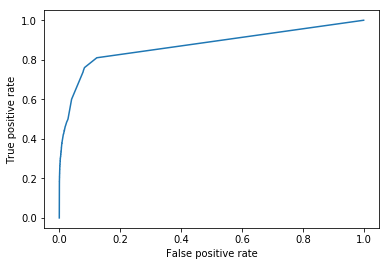

In [8]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [9]:
print("Area =", skl.metrics.auc(fpr, tpr))

Area = 0.8721853202858163


In [10]:
# set the feature names to make the model visualisations more interpretable;
# (this is unfortunately not done automatically by XGBoost's model
# loading/saving functionality, which is rather annoying)
# The XGBoost implementation is a little buggy here I think; we need to set this
# after the first call to model predict().
model.get_booster().feature_names = predictor_names

Now let's visualise the resulting trees:


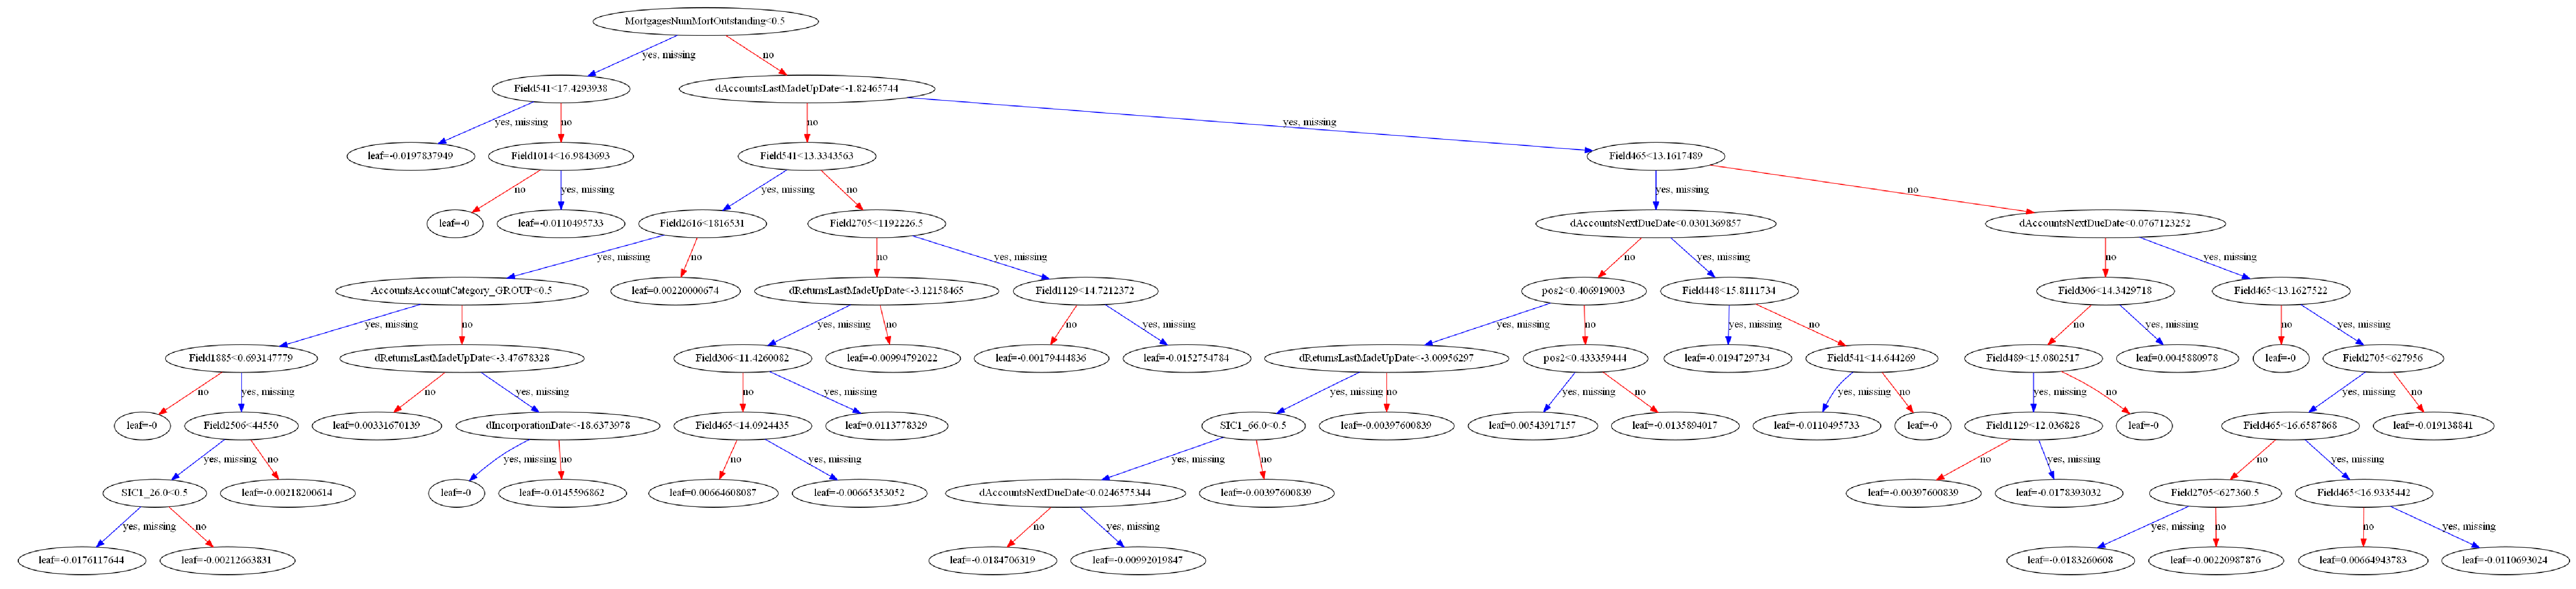

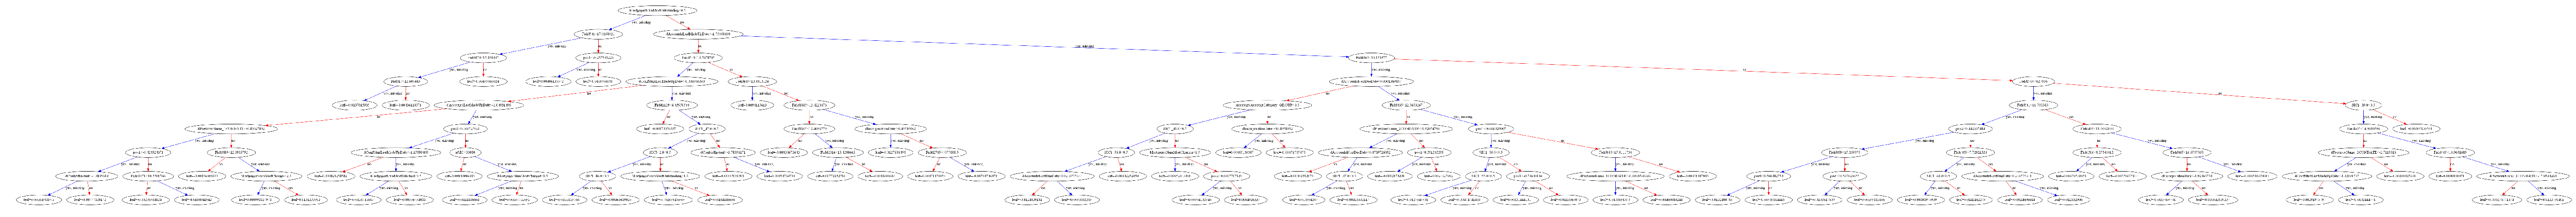

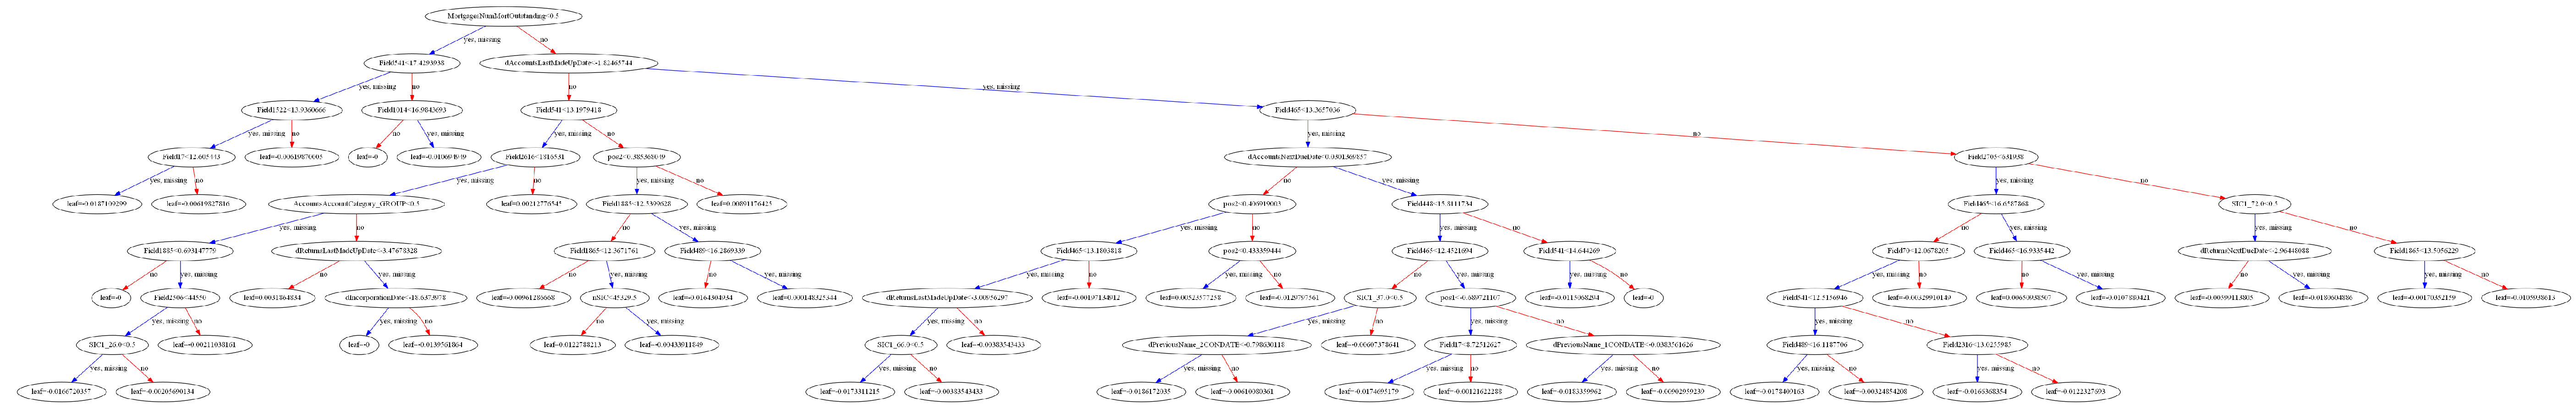

In [11]:
print("Now let's visualise the resulting trees:")

total_num_trees = len(model.get_booster().get_dump())

# only visualise a random subset of trees
N_vis = 3
trees_to_vis = list(range(total_num_trees))
random.shuffle(trees_to_vis)
trees_to_vis = trees_to_vis[:N_vis]

for i in trees_to_vis:
    fig, ax = plt.subplots(figsize=(100, 100))
    plot_tree(model, num_trees=i, ax=ax)
    plt.show()

Let's visualise the importance of each feature!
Firstly, look at feature weight (the number of times a feature is used to split the data, across all trees):


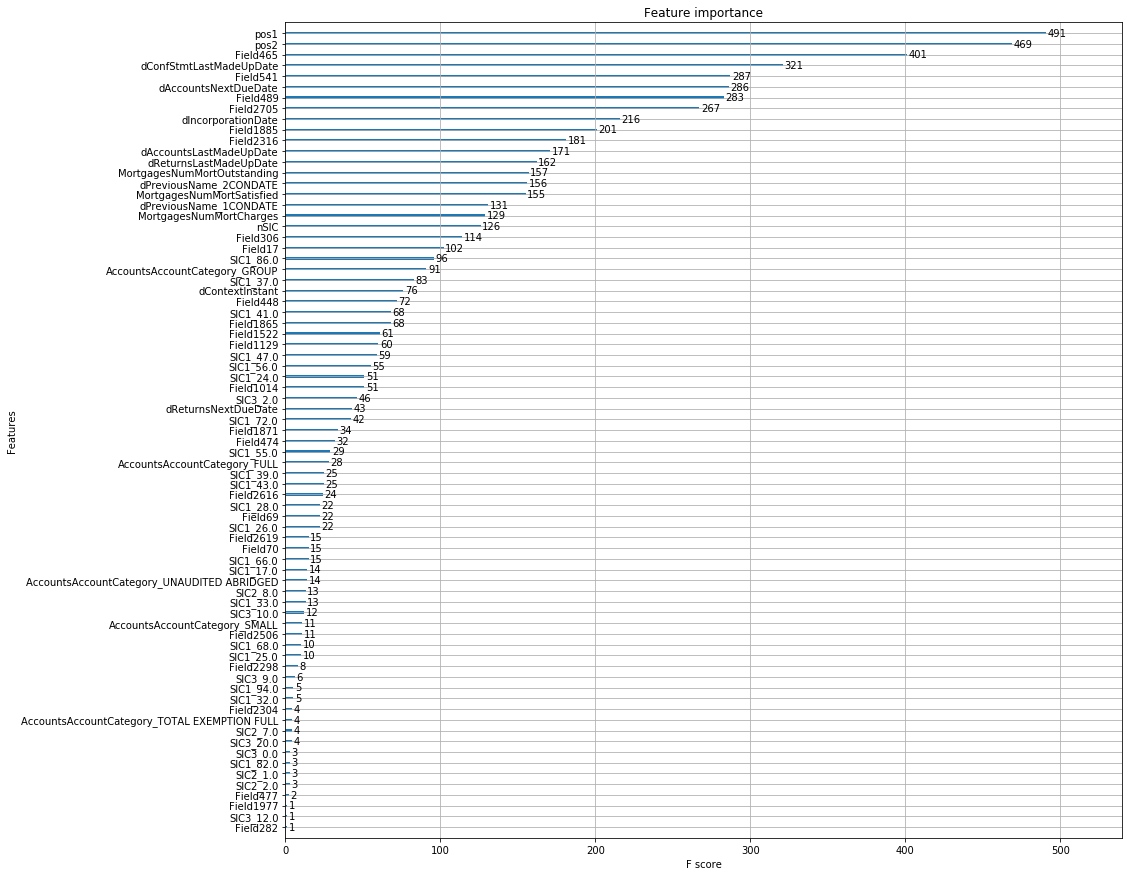

Secondly, look at feature cover (the number of times a feature is used to split the data, across all trees, but weighted by the number of training points that go through the split):


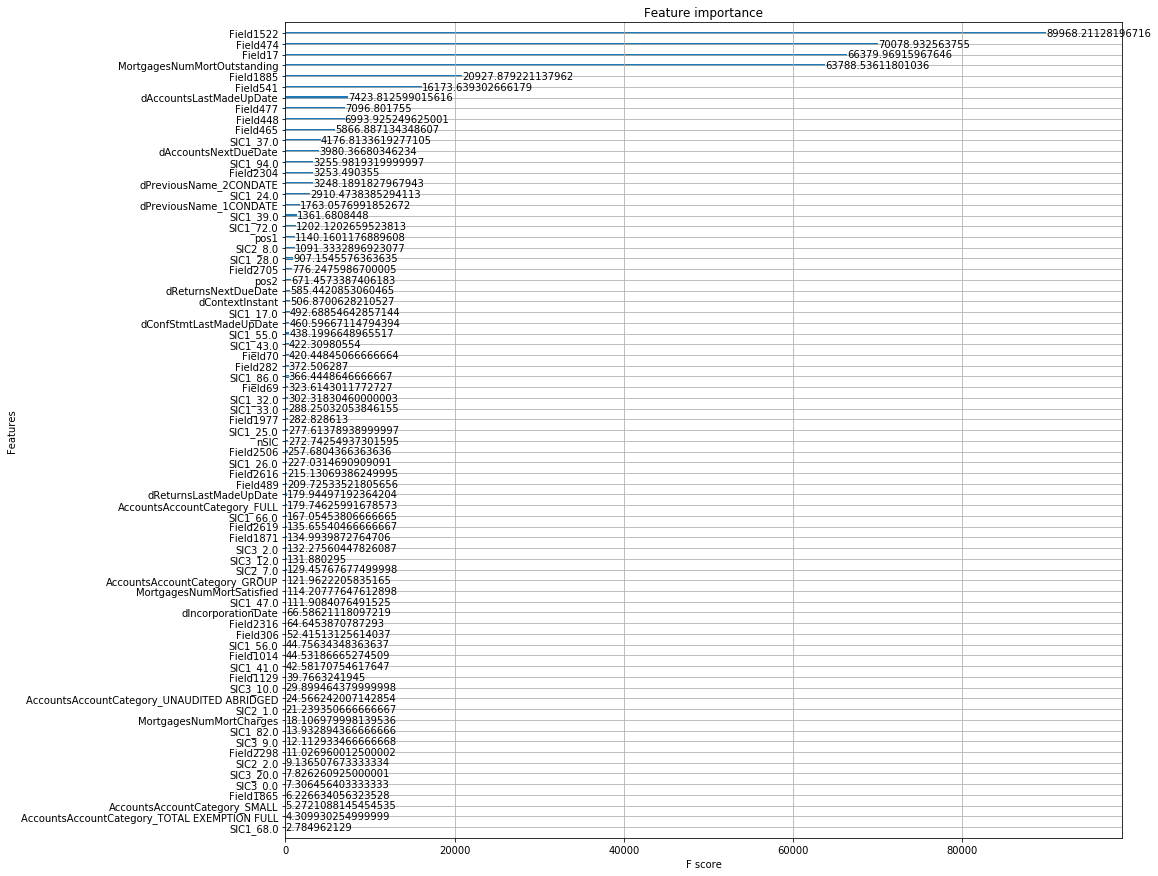

Finally, look at feature gain (the average training data loss reduction obtained when using a feature for splitting):


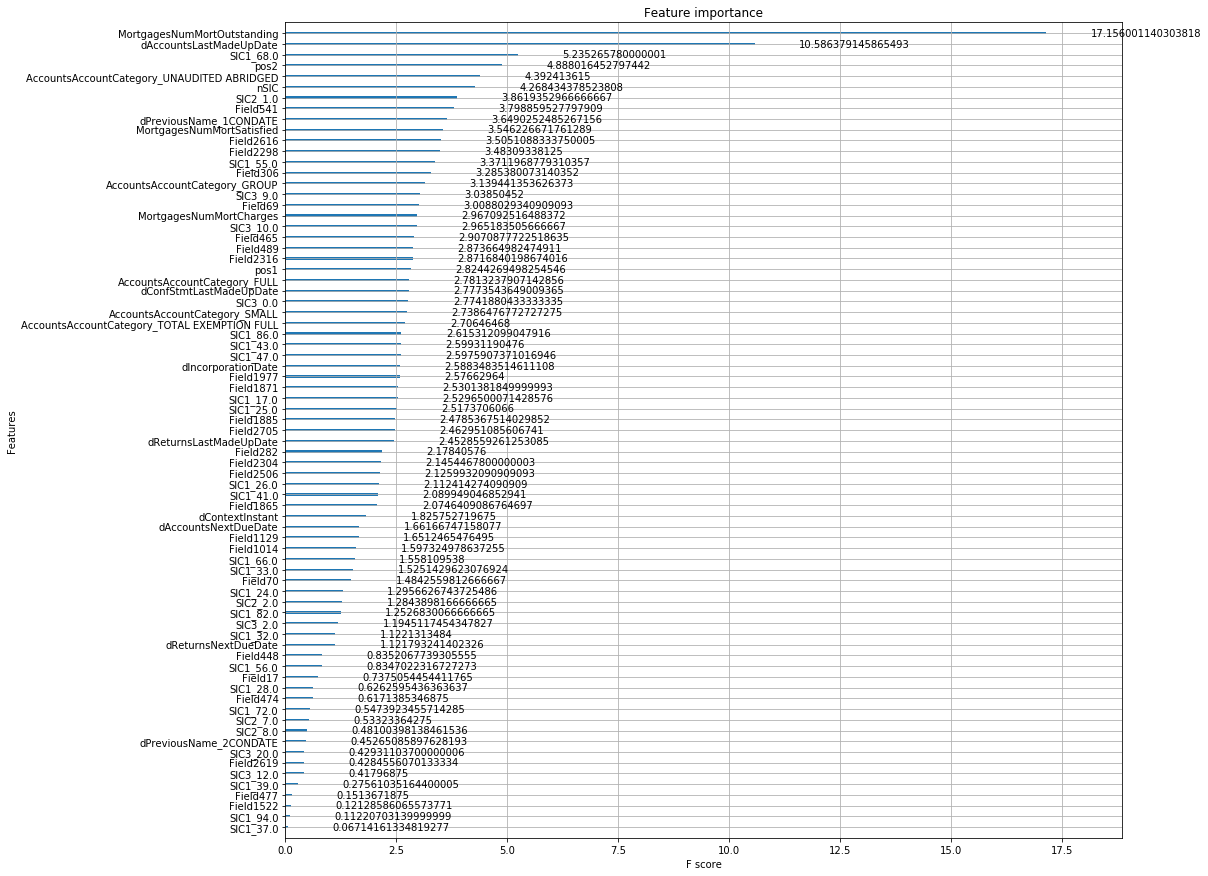

In [12]:
print("Let's visualise the importance of each feature!")

print("Firstly, look at feature weight (the number of times"
      " a feature is used to split the data, across all trees):")
fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(model, importance_type='weight', ax=ax)
plt.show()

print("Secondly, look at feature cover (the number of times a "
      "feature is used to split the data, across all trees, "
      "but weighted by the number of training points that go "
      "through the split):")
fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(model, importance_type='cover', ax=ax)
plt.show()

print("Finally, look at feature gain (the average training data "
      "loss reduction obtained when using a feature for splitting):")
fig, ax = plt.subplots(figsize=(15, 15))
plot_importance(model, importance_type='gain', ax=ax)
plt.show()